This notebook is from the [R_datacarpentry](https://datacarpentry.org/r-socialsci/03-dplyr-tidyr/index.html). The purpose is to review  for interview.    
1. **tidyverse**  



In [1]:
library(tidyverse)

interviews <- read_csv("C:/training/data/SAFI_clean.csv", na = "NULL")

## inspect the data
head(interviews,3)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  key_ID = col_double(),
  village = col_character(),
  interview_date = col_datetime(format = ""),
  no_membrs = col_double(),
  years_liv = col_double(),
  respondent_wall_type = col_character(),
  rooms = col_double(),
  memb_assoc = col_character(),
  affect_conflicts = col_character(),
  liv_count = col_double(),
  item

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
3,God,2016-11-17,10,15,burntbricks,1,NA,NA,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007


Select a column and filter row

In [2]:
select(interviews, village, no_membrs, years_liv)[1:2,]

village,no_membrs,years_liv
God,3,4
God,7,9


In [3]:
#Choose specified row
filter(interviews, village=="God")[1:2,]

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e


# Using pipe

In [4]:
interviews_god <- select(filter(interviews, village == "God"), no_membrs, years_liv)

**Or**

In [5]:
interviews_god <- interviews %>%
    filter(village == "God") %>%
    select(no_membrs, years_liv)

interviews_god[1:2,]

no_membrs,years_liv
3,4
7,9


**Mutate**

In [6]:
interviews %>%
    mutate(people_per_room = no_membrs / rooms) %>% head(2)

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,people_per_room
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,3
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,7


There is a case that missing data can cause NULL value, we avoid by filter

In [7]:
interviews %>%
    filter(!is.na(memb_assoc)) %>%
    mutate(people_per_room = no_membrs / rooms) %>% head(2)

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,people_per_room
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,7
7,God,2016-11-17,6,38,muddaub,1,no,never,1,motorcyle;cow_plough,3,Nov,uuid:ae20a58d-56f4-43d7-bafa-e7963d850844,6


**Summarize**

In [8]:
#  to compute the average household size by village:
interviews %>%
    group_by(village) %>%
    summarize(mean_no_membrs = mean(no_membrs))

village,mean_no_membrs
Chirodzo,7.076923
God,6.860465
Ruaca,7.571429


In [9]:
interviews %>%
    group_by(village, memb_assoc) %>%
    summarize(mean_no_membrs = mean(no_membrs))

village,memb_assoc,mean_no_membrs
Chirodzo,NA,5.083333
Chirodzo,no,8.062500
Chirodzo,yes,7.818182
God,NA,6.000000
God,no,7.133333
God,yes,8.000000
Ruaca,NA,6.222222
Ruaca,no,7.178571
Ruaca,yes,9.500000


we see rows in our table for respondents who did not specify whether they were a member of an irrigation association. We can **exclude those data** from our table using a filter step.

In [10]:
interviews %>%
    filter(!is.na(memb_assoc)) %>%
    group_by(village, memb_assoc) %>%
    summarize(mean_no_membrs = mean(no_membrs),
              min_membrs = min(no_membrs))

village,memb_assoc,mean_no_membrs,min_membrs
Chirodzo,no,8.062500,4
Chirodzo,yes,7.818182,2
God,no,7.133333,3
God,yes,8.000000,5
Ruaca,no,7.178571,2
Ruaca,yes,9.500000,5


**Sort**

In [11]:
interviews %>%
    filter(!is.na(memb_assoc)) %>%
    group_by(village, memb_assoc) %>%
    summarize(mean_no_membrs = mean(no_membrs), min_membrs = min(no_membrs)) %>%
    arrange(min_membrs)

village,memb_assoc,mean_no_membrs,min_membrs
Chirodzo,yes,7.818182,2
Ruaca,no,7.178571,2
God,no,7.133333,3
Chirodzo,no,8.062500,4
God,yes,8.000000,5
Ruaca,yes,9.500000,5


To sort in descending order, we need to add the desc() function. If we want to sort the results by decreasing order of minimum household size:

In [12]:
interviews %>%
    filter(!is.na(memb_assoc)) %>%
    group_by(village, memb_assoc) %>%
    summarize(mean_no_membrs = mean(no_membrs),
              min_membrs = min(no_membrs)) %>%
    arrange(desc(min_membrs))

village,memb_assoc,mean_no_membrs,min_membrs
God,yes,8.000000,5
Ruaca,yes,9.500000,5
Chirodzo,no,8.062500,4
God,no,7.133333,3
Chirodzo,yes,7.818182,2
Ruaca,no,7.178571,2


**Counting**   
For this task, dplyr provides count(). For example, we can count the number of rows of data for each village and sort in descreasing order

In [13]:
interviews %>%
    count(village, sort = TRUE)

village,n
Ruaca,49
God,43
Chirodzo,39


What was the largest household interviewed in each month?

In [14]:
library(lubridate)

interviews %>%
    mutate(month = month(interview_date),
           day = day(interview_date),
           year = year(interview_date)) %>%
    group_by(year, month) %>%
    summarize(max_no_membrs = max(no_membrs))


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



year,month,max_no_membrs
2016,11,19
2016,12,12
2017,4,17
2017,5,15
2017,6,15


## Reshaping with gather and spread   

**Convert long to wide format**

spread() takes three principal arguments:
    the data
    the key column variable whose values will become new column names.
    the value column variable whose values will fill the new column variables.

Further arguments include fill which, if set, fills in missing values with the value provided. for example we could compare the ratio of household members to sleeping rooms grouped by type of construction material. The key point here is that we are still following a tidy data structure, but we have reshaped the data according to the observations of interest. tidyr provide **spread()** and **gather()**.

In [16]:
## Create new columns for each type of wall construction material   
interviews_spread <- interviews %>%
    mutate(wall_type_logical = TRUE) %>%
    spread(key = respondent_wall_type, value = wall_type_logical, fill = FALSE)
interviews_spread[1:2,]

key_ID,village,interview_date,no_membrs,years_liv,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,burntbricks,cement,muddaub,sunbricks
1,God,2016-11-17,3,4,1,NA,NA,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,FALSE,FALSE,TRUE,FALSE
1,God,2016-11-17,7,9,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,FALSE,FALSE,TRUE,FALSE


## Gathering   
**gather** transform w wide to long format and takes four principal arguments:

    the data
    the key column variable we wish to create from column names.
    the value column variable we wish to create and fill with values associated with the key.
    the names of the columns we use to fill the key variable (or to drop).


In [17]:
## reconstruct data
interviews_gather <- interviews_spread %>%
    gather(key = respondent_wall_type, value = "wall_type_logical",
           burntbricks:sunbricks)
interviews_gather[1:2,]


key_ID,village,interview_date,no_membrs,years_liv,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,respondent_wall_type,wall_type_logical
1,God,2016-11-17,3,4,1,NA,NA,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,burntbricks,FALSE
1,God,2016-11-17,7,9,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,burntbricks,FALSE


Only one row for each interview respondent is informative - we know that if the house walls are made of “sunbrick” they aren’t made of any other the other materials. Therefore, we can get filter our dataset to only keep values where wall_type_logical is TRUE. Because, wall_type_logical is already either TRUE or FALSE, when passing the column name to filter(), it will automatically already only keep rows where this column has the value TRUE. We can then remove the wall_type_logical column. We do all of these steps together in the next chunk of code:

In [18]:
interviews_gather <- interviews_spread %>%
    gather(key = "respondent_wall_type", value = "wall_type_logical",
           burntbricks:sunbricks) %>%
    filter(wall_type_logical) %>%
    select(-wall_type_logical)
interviews_gather[1:2,]

key_ID,village,interview_date,no_membrs,years_liv,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,respondent_wall_type
3,God,2016-11-17,10,15,1,NA,NA,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007,burntbricks
4,God,2016-11-17,7,6,1,NA,NA,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973,burntbricks


## generate data from splitting a specified column   
For example, the **items_owned** column contains information about whether our respondents owned a **fridge, a television,** etc. To make this data easier to analyze, we will split this column and create a new column for each item. Each cell in that column will either be TRUE or FALSE and will indicate whether that interview respondent owned that item.

In [19]:
interviews[1:2, 'items_owned']

items_owned
bicycle;television;solar_panel;table
cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone


In [20]:
interviews_items_owned <- interviews %>%
    mutate(split_items = strsplit(items_owned, ";")) %>%
    unnest() %>%   # Create a long format 
    mutate(items_owned_logical = TRUE) %>%
    spread(key = split_items, value = items_owned_logical, fill = FALSE)  # convert from long format to short format

interviews_items_owned[1:3,]

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,...,mobile_phone,motorcyle,radio,sofa_set,solar_panel,solar_torch,sterio,table,television,<NA>
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,...,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
3,God,2016-11-17,10,15,burntbricks,1,NA,NA,1,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [25]:
dim(interviews_items_owned)

[1] 131  32

This format of the data allows us to do interesting things, like make a table showing the number of respondents in each village who owned a particular item:

In [26]:
interviews_items_owned %>%
    filter(bicycle) %>%
    group_by(village) %>%
    count(bicycle)

village,bicycle,n
Chirodzo,TRUE,17
God,TRUE,23
Ruaca,TRUE,20


Use **rowSum** to calculate the average number of items from the list owned by respondents in each village

In [27]:
interviews_items_owned %>%
    mutate(number_items = rowSums(select(., bicycle:television))) %>%
    group_by(village) %>%
    summarize(mean_items = mean(number_items))

village,mean_items
Chirodzo,4.538462
God,3.976744
Ruaca,5.571429


In [28]:
str(interviews)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	131 obs. of  14 variables:
 $ key_ID              : num  1 1 3 4 5 6 7 8 9 10 ...
 $ village             : chr  "God" "God" "God" "God" ...
 $ interview_date      : POSIXct, format: "2016-11-17" "2016-11-17" ...
 $ no_membrs           : num  3 7 10 7 7 3 6 12 8 12 ...
 $ years_liv           : num  4 9 15 6 40 3 38 70 6 23 ...
 $ respondent_wall_type: chr  "muddaub" "muddaub" "burntbricks" "burntbricks" ...
 $ rooms               : num  1 1 1 1 1 1 1 3 1 5 ...
 $ memb_assoc          : chr  NA "yes" NA NA ...
 $ affect_conflicts    : chr  NA "once" NA NA ...
 $ liv_count           : num  1 3 1 2 4 1 1 2 3 2 ...
 $ items_owned         : chr  "bicycle;television;solar_panel;table" "cow_cart;bicycle;radio;cow_plough;solar_panel;solar_torch;table;mobile_phone" "solar_torch" "bicycle;radio;cow_plough;solar_panel;mobile_phone" ...
 $ no_meals            : num  2 2 2 2 2 2 3 2 3 3 ...
 $ months_lack_food    : chr  "Jan" "Jan;Sept;Oct;Nov;

Create a new data frame (named interviews_months_lack_food) that has one column for each month and records TRUE or FALSE for whether each interview respondent was lacking food in that month.

In [29]:
interviews_months_lack_food <- interviews %>%
  mutate(split_months = strsplit(months_lack_food, ";")) %>%
  unnest() %>%
  mutate(months_lack_food_logical  = TRUE) %>%
  spread(key = split_months, value = months_lack_food_logical, fill = FALSE)

interviews_months_lack_food[1:2,]

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,...,Feb,Jan,July,June,Mar,May,none,Nov,Oct,Sept
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


**How many months (on average)** were respondents **without food** if they did belong to an irrigation association? What about if they didn’t?
    

In [30]:
interviews_months_lack_food %>%
  mutate(number_months = rowSums(select(., Apr:Sept))) %>%
  group_by(memb_assoc) %>%
  summarize(mean_months = mean(number_months))

interviews_months_lack_food[1:2,]

memb_assoc,mean_months
NA,2.948718
no,2.305085
yes,2.636364


key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,...,Feb,Jan,July,June,Mar,May,none,Nov,Oct,Sept
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [31]:
interviews_plotting <- interviews %>%
    ## spread data by items_owned
    mutate(split_items = strsplit(items_owned, ";")) %>%
    unnest() %>%
    mutate(items_owned_logical = TRUE) %>%
    spread(key = split_items, value = items_owned_logical, fill = FALSE) %>%
    rename(no_listed_items = `<NA>`) %>%
    ## spread data by months_lack_food
    mutate(split_months = strsplit(months_lack_food, ";")) %>%
    unnest() %>%
    mutate(months_lack_food_logical = TRUE) %>%
    spread(key = split_months, value = months_lack_food_logical, fill = FALSE) %>%
    ## add some summary columns
    mutate(number_months_lack_food = rowSums(select(., Apr:Sept))) %>%
    mutate(number_items = rowSums(select(., bicycle:television)))

interviews_plotting[1:2,]

key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,...,July,June,Mar,May,none,Nov,Oct,Sept,number_months_lack_food,number_items
1,God,2016-11-17,3,4,muddaub,1,NA,NA,1,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1,4
1,God,2016-11-17,7,9,muddaub,1,yes,once,3,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,5,8


**Keys**   


    . Use the dplyr package to manipulate dataframes.
    . Use select() to choose variables from a dataframe.
    . Use filter() to choose data based on values.
    . Use group_by() and summarize() to work with subsets of data.
    . Use mutate() to create new variables.
    . Use the tidyr package to change the layout of dataframes.
    . Use gather() to go from wide to long format.
    . Use spread() to go from long to wide format.


## Visualize data with ggplot2

In [32]:
# Assign plot to a variable
interviews_plot <- ggplot(data = interviews_plotting, aes(x = no_membrs, y = number_items))


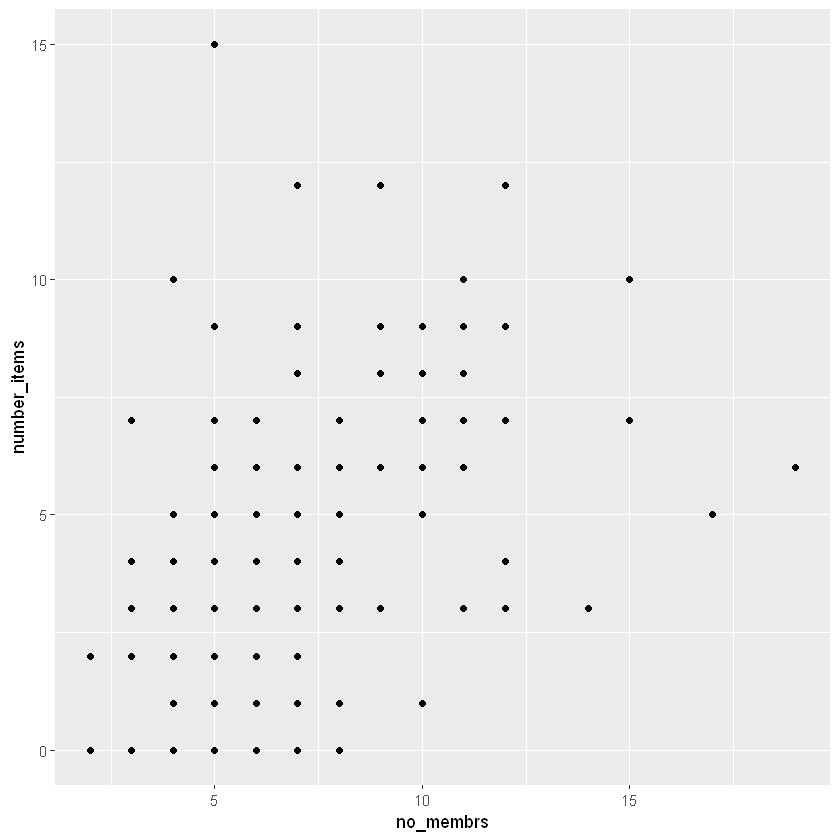

In [33]:
## This is the correct syntax for adding layers
interviews_plot +
    geom_point()

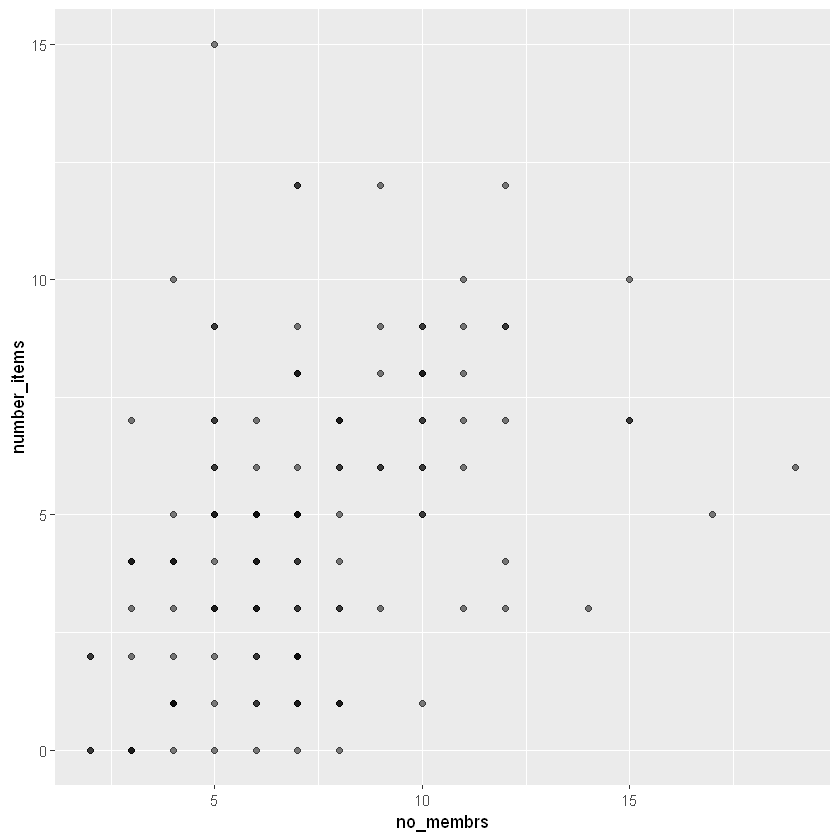

In [34]:
# adding transparent
ggplot(data = interviews_plotting, aes(x = no_membrs, y = number_items)) +
    geom_point(alpha = 0.5)

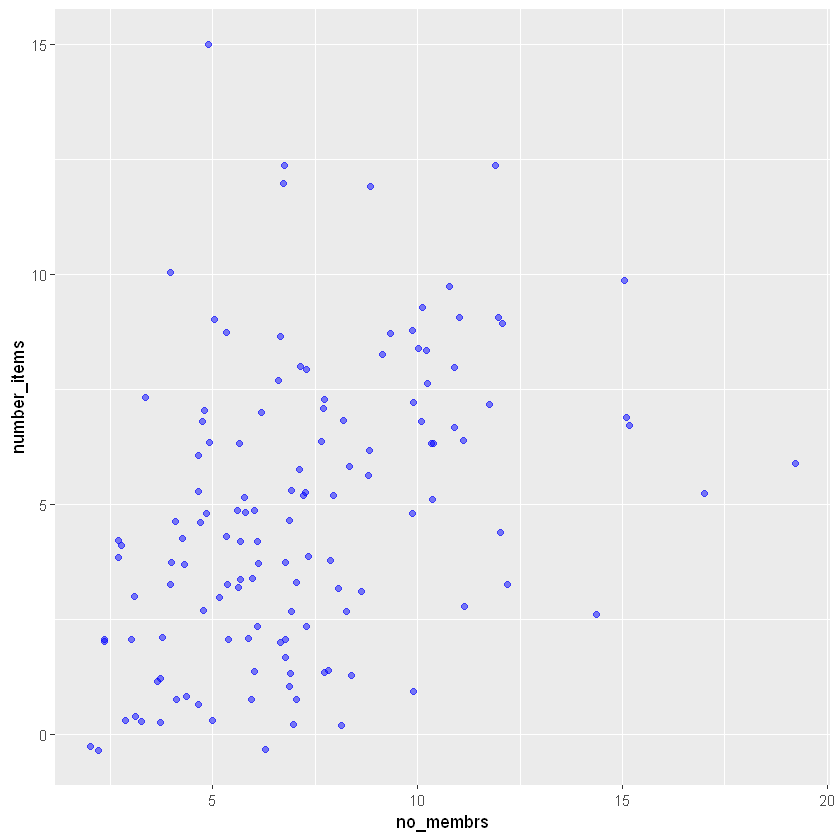

In [35]:
ggplot(data = interviews_plotting, aes(x = no_membrs, y = number_items)) +
geom_jitter(alpha = 0.5, color = "blue")

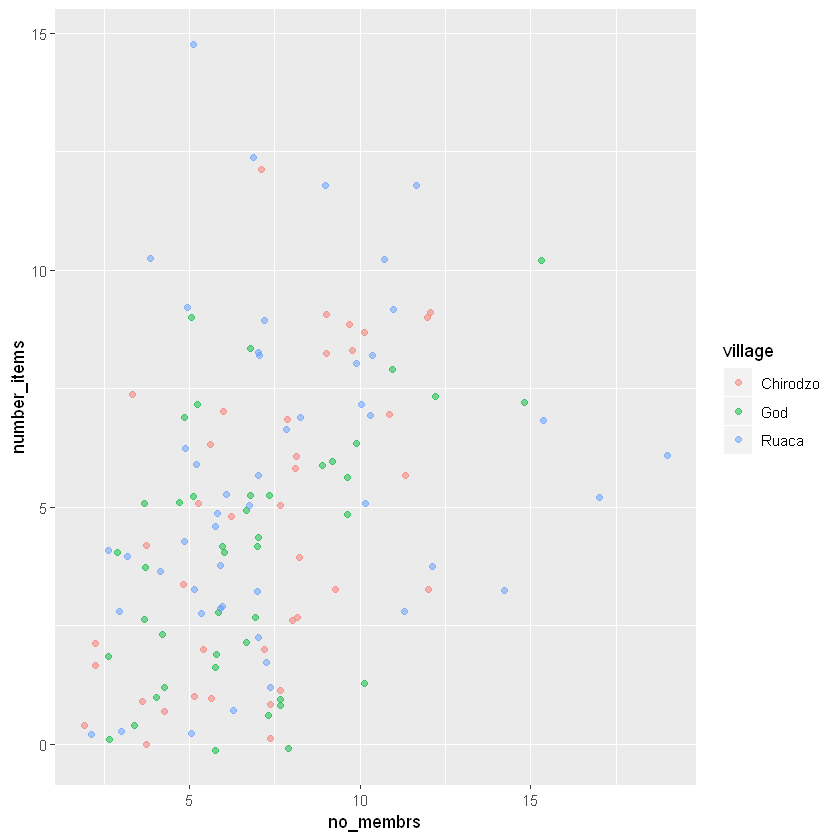

In [36]:
# Color each 
ggplot(data = interviews_plotting, aes(x = no_membrs, y = number_items)) +
    geom_jitter(aes(color = village), alpha = 0.5)

Use what you just learned to create a scatter plot of rooms by village with the respondent_wall_type showing in different colors. Is this a good way to show this type of data?

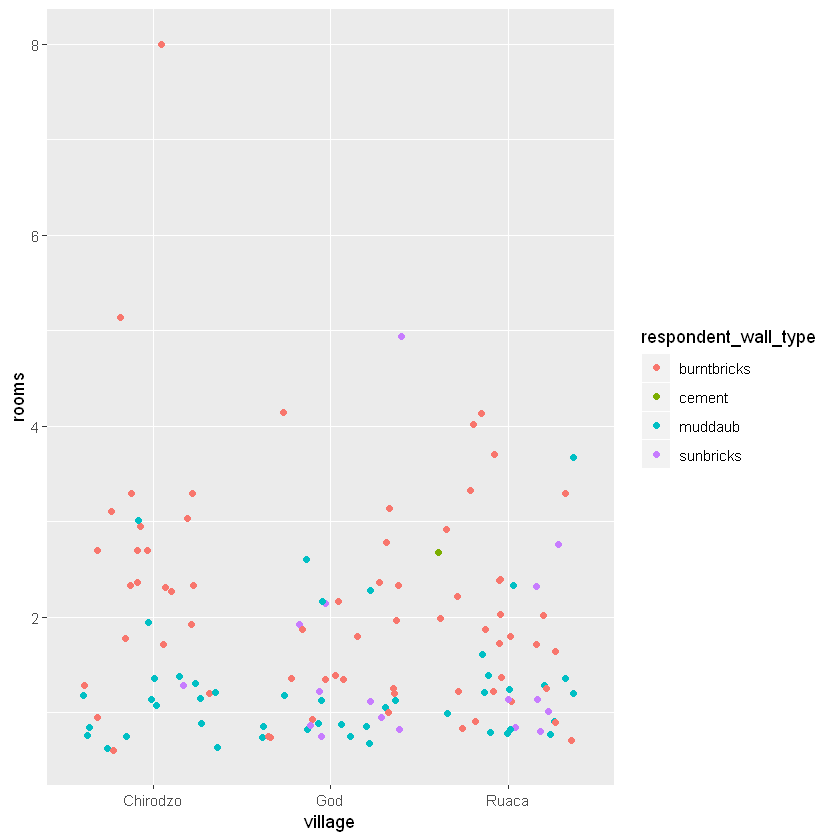

In [37]:
ggplot(data = interviews_plotting, aes(x = village, y = rooms)) +
geom_jitter(aes(color = respondent_wall_type))

This is not a good way to show this type of data because it is difficult to distinguish between villages.   
## Boxplot 

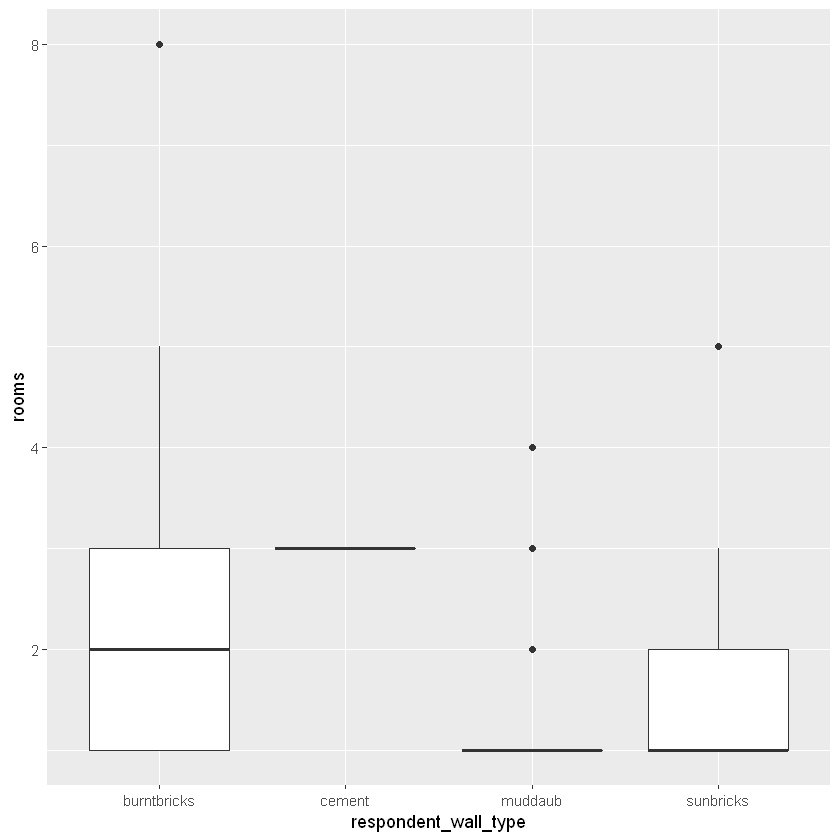

In [38]:
ggplot(data = interviews_plotting, aes(x = respondent_wall_type, y = rooms)) +
    geom_boxplot()

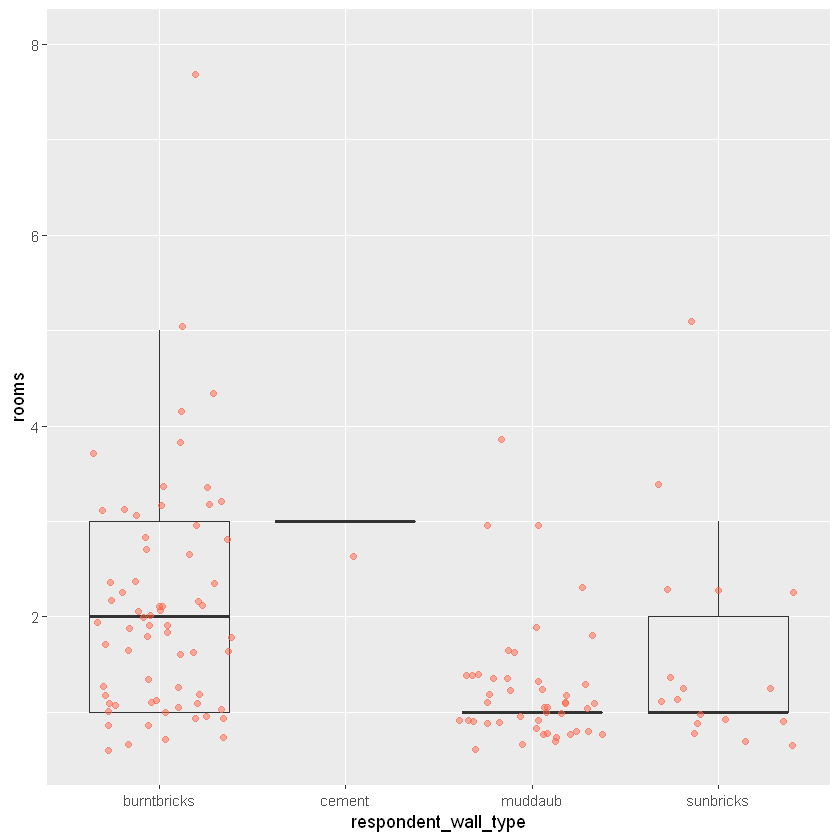

In [39]:
ggplot(data = interviews_plotting, aes(x = respondent_wall_type, y = rooms)) +
    geom_boxplot(alpha = 0) +
    geom_jitter(alpha = 0.5, color = "tomato")

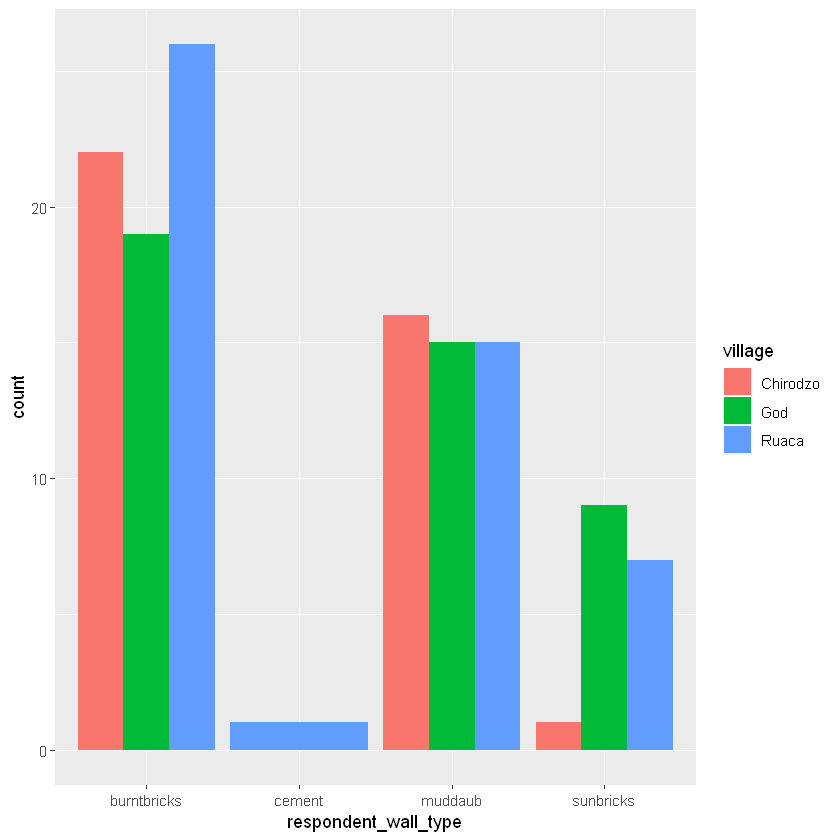

In [40]:
ggplot(data = interviews_plotting, aes(x = respondent_wall_type)) +
    geom_bar(aes(fill = village), position = "dodge")

In [41]:
percent_wall_type <- interviews_plotting %>%
    filter(respondent_wall_type != "cement") %>%
    count(village, respondent_wall_type) %>%
    group_by(village) %>%
    mutate(percent = n / sum(n)) %>%
    ungroup()

percent_wall_type[1:2,]

village,respondent_wall_type,n,percent
Chirodzo,burntbricks,22,0.5641026
Chirodzo,muddaub,16,0.4102564


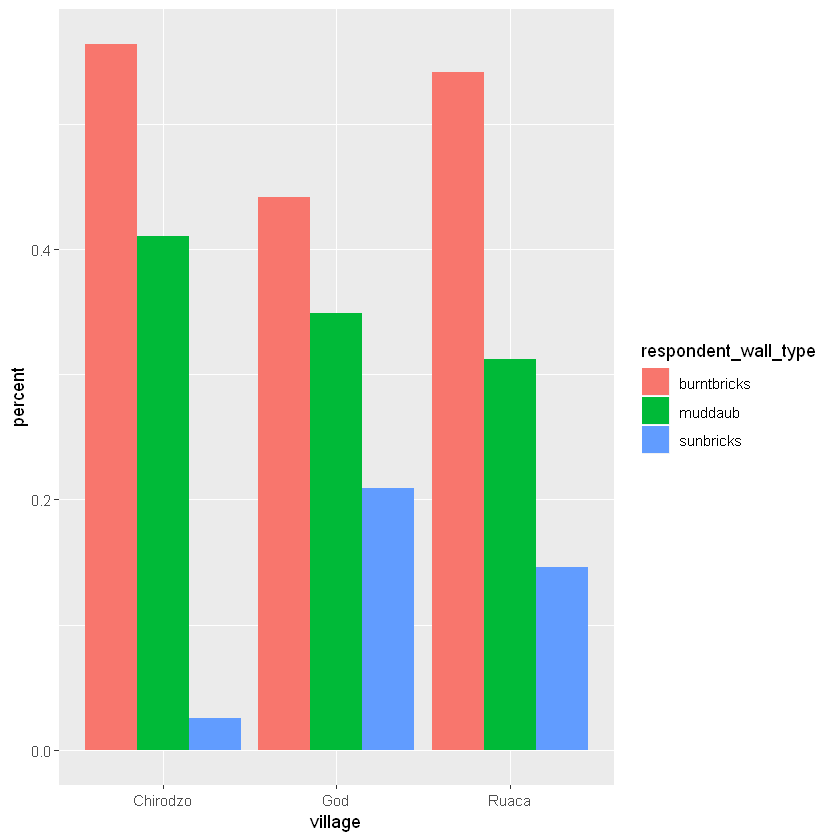

In [42]:
ggplot(percent_wall_type, aes(x = village, y = percent, fill = respondent_wall_type)) +
     geom_bar(stat = "identity", position = "dodge")

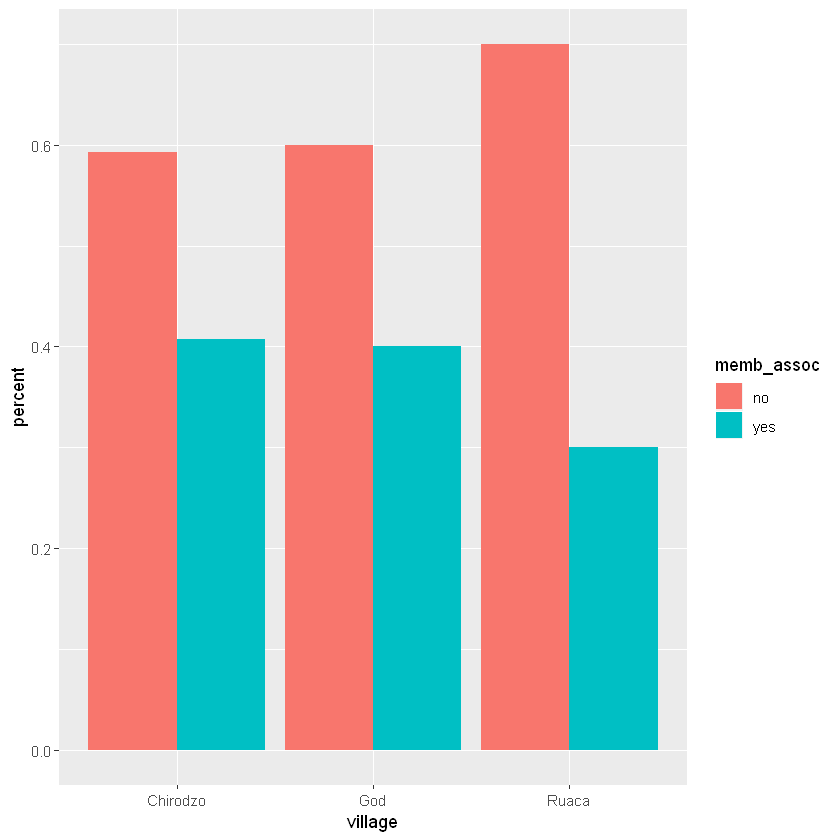

In [43]:
percent_memb_assoc <- interviews_plotting %>%
  filter(!is.na(memb_assoc)) %>%
  count(village, memb_assoc) %>%
  group_by(village) %>%
  mutate(percent = n / sum(n)) %>%
  ungroup()

ggplot(percent_memb_assoc, aes(x = village, y = percent, fill = memb_assoc)) +
geom_bar(stat = "identity", position = "dodge")

## Faceting   
we may want to create multiple plot, where each plot shows the data for a single village. This would be especially useful if we had a large number of villages that we had sampled, as a large number of side-by-side bars will become more difficult to read.

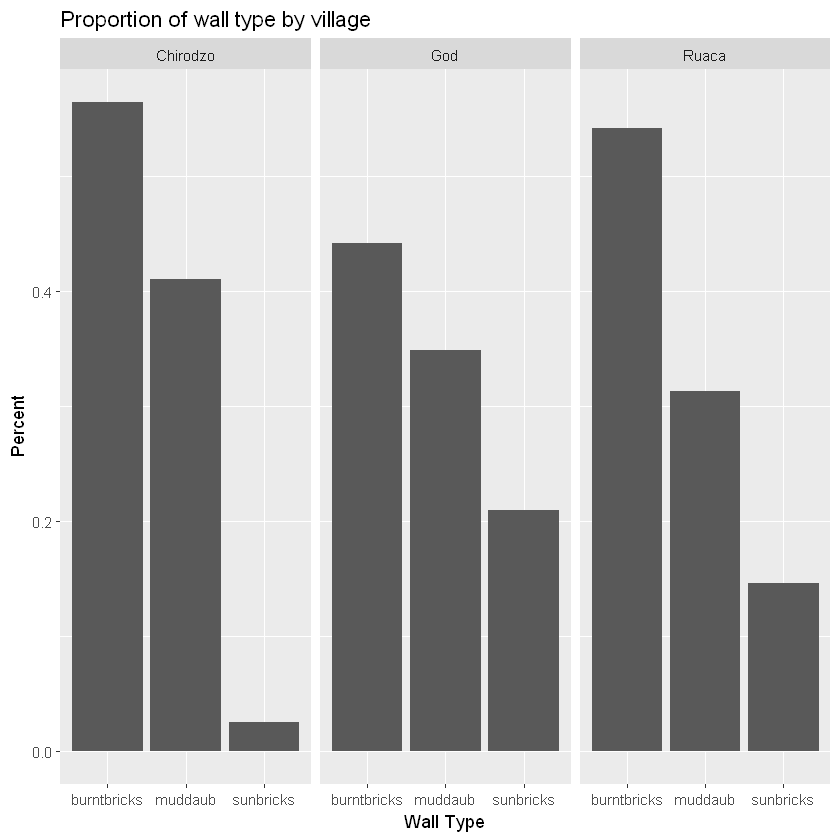

In [44]:
ggplot(percent_wall_type, aes(x = respondent_wall_type, y = percent)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title="Proportion of wall type by village",
         x="Wall Type",
         y="Percent") +
    facet_wrap(~ village)

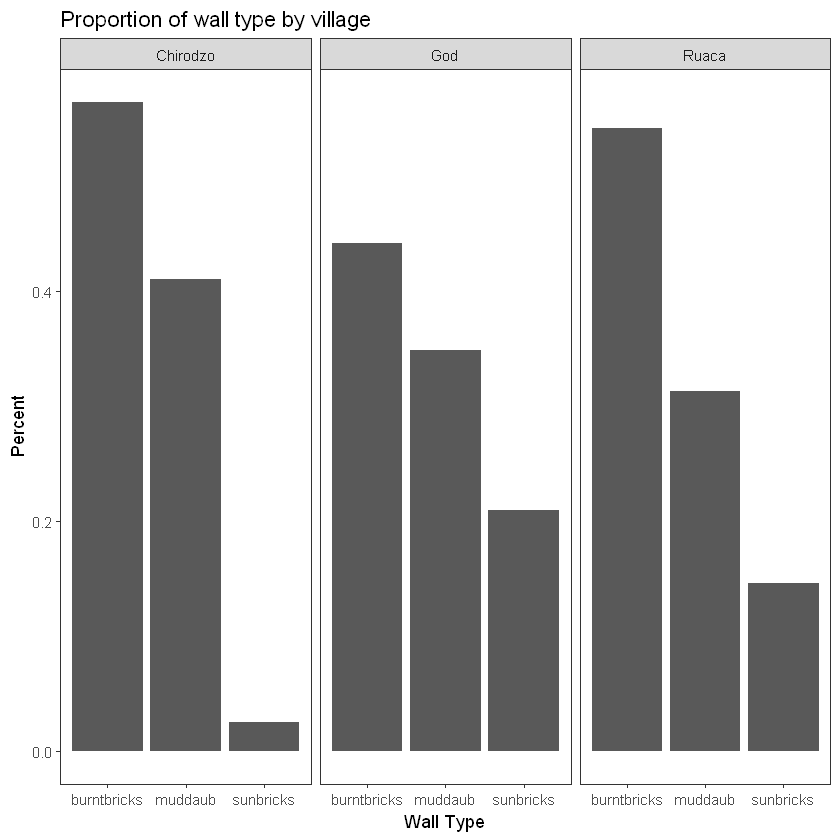

In [49]:
ggplot(percent_wall_type, aes(x = respondent_wall_type, y = percent)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title="Proportion of wall type by village",
         x="Wall Type",
         y="Percent") +
    facet_wrap(~ village) +
    theme_bw() +
    theme(panel.grid = element_blank())

What if we wanted to see the proportion of respondents in each village who owned a particular item? We can calculate the percent of people in each village who own each item and then create a faceted series of bar plots where each plot is a particular item. First we need to calculate the percentage of people in each village who own each item:

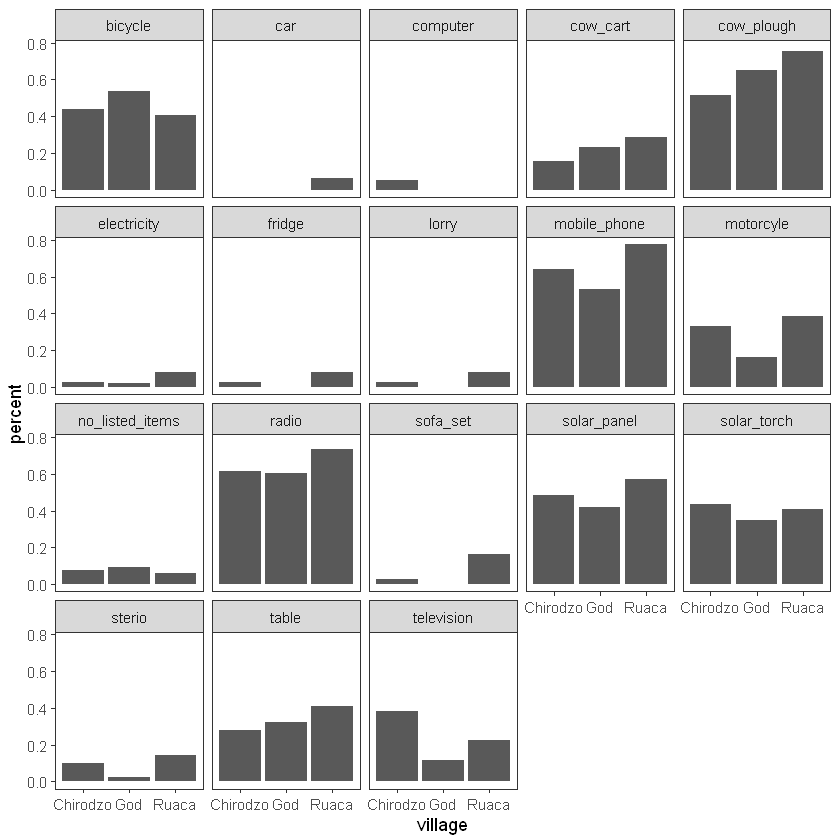

In [51]:
percent_items <- interviews_plotting %>%
    gather(items, items_owned_logical, bicycle:no_listed_items) %>%
    filter(items_owned_logical) %>%
    count(items, village) %>%
    ## add a column with the number of people in each village
    mutate(people_in_village = case_when(village == "Chirodzo" ~ 39,
                                         village == "God" ~ 43,
                                         village == "Ruaca" ~ 49)) %>%
    mutate(percent = n / people_in_village)

ggplot(percent_items, aes(x = village, y = percent)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~ items) +
    theme_bw() +
    theme(panel.grid = element_blank())

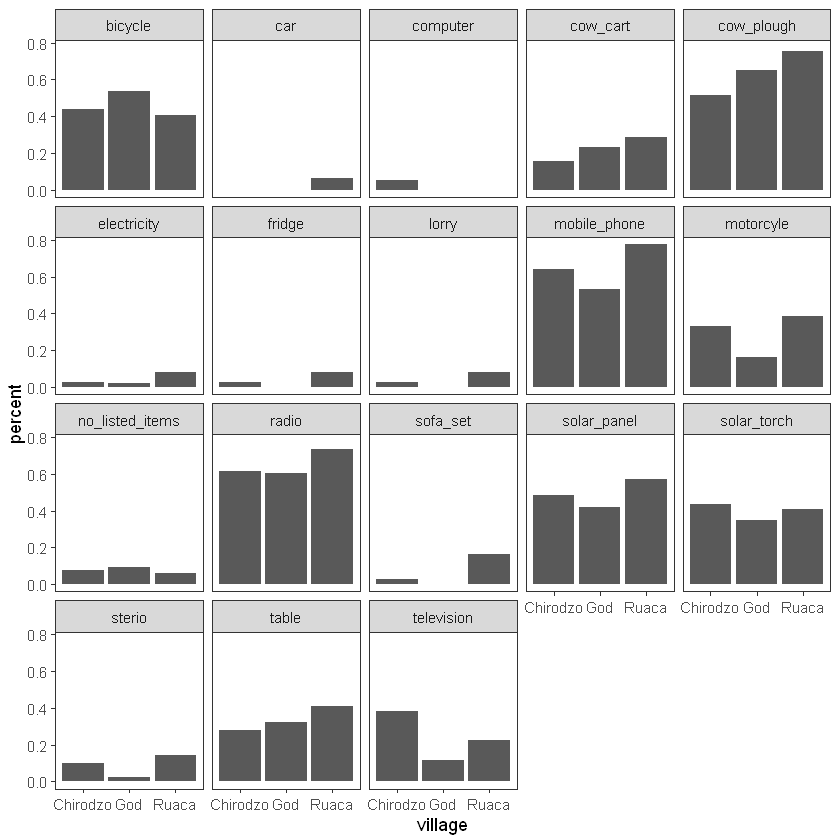

In [52]:
ggplot(percent_items, aes(x = village, y = percent)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~ items) +
    theme_bw() +
    theme(panel.grid = element_blank())

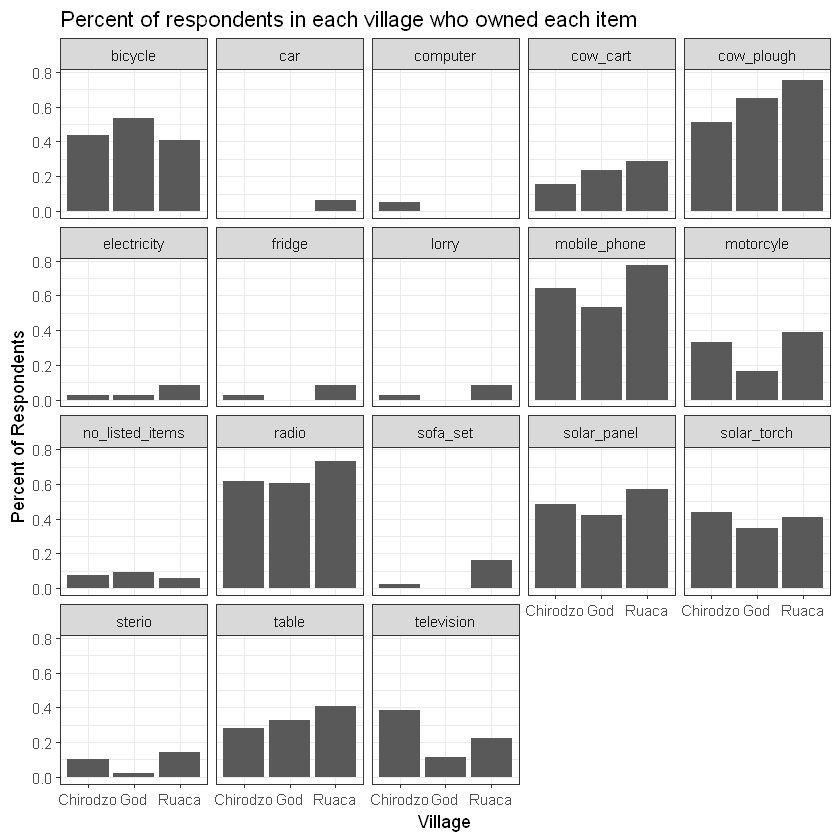

In [53]:
ggplot(percent_items, aes(x = village, y = percent)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_wrap(~ items) +
    labs(title = "Percent of respondents in each village who owned each item",
         x = "Village",
         y = "Percent of Respondents") +
    theme_bw()

## Using apply, lapply, sapply and tapply   
We use **apply** over matrix   
apply(X, MARGIN, FUN)   
Here:   
- x: an array or matrix   
- MARGIN:  take a value or range between 1 and 2 to define where to apply the function:   
- MARGIN=1`: the manipulation is performed on rows   
- MARGIN=2`: the manipulation is performed on columns    
- MARGIN=c(1,2)` the manipulation is performed on rows and columns   
- FUN: tells which function to apply. Built functions like mean, median, sum, min, max and even user-defined functions can be applied>

In [86]:
m1 <- matrix(C<-(1:10),nrow=5, ncol=6)
m1
a_m1 <- apply(m1, 2, sum)
a_m1

1,6,1,6,1,6
2,7,2,7,2,7
3,8,3,8,3,8
4,9,4,9,4,9
5,10,5,10,5,10


[1] 15 40 15 40 15 40

## lapply() function   
lapply(X, FUN)   
Arguments:   
-X: A vector or an object   
-FUN: Function applied to each element of x	   

 The difference between lapply() and apply() lies between the output return. The output of lapply() is a list.

In [91]:
movies <- c("SPYDERMAN","BATMAN","VERTIGO","CHINATOWN")
movies_lower <-lapply(movies, tolower)
movies_lower[1]

[[1]]
[1] "spyderman"

We can use unlist() to convert the list into a vector

In [92]:
movies_lower <-unlist(lapply(movies,tolower))
str(movies_lower)

 chr [1:4] "spyderman" "batman" "vertigo" "chinatown"


## sapply() function   
sapply(X, FUN)   
Arguments:   
-X: A vector or an object   
-FUN: Function applied to each element of x   

In [93]:
dt <- cars
lmn_cars <- lapply(dt, min)
smn_cars <- sapply(dt, min)
lmn_cars

$speed
[1] 4

$dist
[1] 2

In [94]:
smn_cars

speed  dist 
    4     2

In [95]:
avg <- function(x) {  
  ( min(x) + max(x) ) / 2}
fcars <- sapply(dt, avg)
fcars

speed  dist 
 14.5  61.0

## tapply() function
The function tapply()   
computes a measure (mean, median, min, max, etc..) or a function for each factor variable in a vector.   

tapply(X, INDEX, FUN = NULL)   
Arguments:   
- X : An object, usually a vector   
- INDEX: A list containing factor   
- FUN: Function applied to each element of x

In [97]:
data(iris)
tapply(iris$Sepal.Width, iris$Species, median)

setosa versicolor  virginica 
       3.4        2.8        3.0

## How to combine data frames?    
The cbind() function is used to combine data frame by columns.


In [55]:
x = c(1:5)
y = c("m","f","f","m","f")
cbind(x,y)

x,y
1,m
2,f
3,f
4,m
5,f


In [56]:
rbind(x,y)

x,1,2,3,4,5
y,m,f,f,m,f


+ While using cbind() function, make sure the number of rows must be equal in both the datasets.   
+ While using rbind() function, make sure both the number and names of columns must be same. If names of columns would not be same, wrong data would be appended to columns or records might go missing.   

## How to combine data by rows when different number of columns?  
https://www.listendata.com/2016/09/r-interview-questions-and-answers.html

The number of columns in datasets are not equal, rbind() function doesn't work 

In [57]:
df = data.frame(x = c(1:4), y = c("m","f","f","m"))
df2 = data.frame(x = c(5:8))

The bind_rows() function from dplyr package can be used to combine data frames when number of columns do not match.

In [58]:
library(dplyr)
combdf = bind_rows(df,df2)

## Window functions   [refer](https://cran.r-project.org/web/packages/dplyr/vignettes/window-functions.html)
It is used to compute aggregate value using cumsum() and cummean(), functions for ranking and ordering, like rank(), and functions for taking offsets, like lead and lag.  [Data source](https://www.kaggle.com/freshrenzo/lahmanbaseballdatabase/downloads/lahmanbaseballdatabase.zip/1)

In [1]:
df <- read.csv("C:/training/data/batting.csv")
dt <- read.csv("C:/training/data/AwardsPlayers.csv")

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [62]:
head(df,3)

playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,0,0,0,0,0,0,0,11
aardsda01,2006,1,CHN,NL,45,43,2,0,0,...,0,0,0,0,0,0,1,0,0,45
aardsda01,2007,1,CHA,AL,25,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [63]:
head(dt,3)

playerID,awardID,yearID,lgID,tie,notes
whitefr01,ALCS MVP,1980,AL,,
nettlgr01,ALCS MVP,1981,AL,,
lynnfr01,ALCS MVP,1982,AL,,


In [64]:
str(df)

'data.frame':	96600 obs. of  24 variables:
 $ playerID : Factor w/ 17908 levels "aardsda01","aaronha01",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 80 80 80 ...
 $ lgID     : Factor w/ 6 levels "AA","AL","FL",..: 4 4 2 2 2 2 2 4 4 4 ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ S

In [65]:
str(dt)

'data.frame':	5920 obs. of  6 variables:
 $ playerID: Factor w/ 1272 levels "aaronha01","abbotji01",..: 1218 821 691 100 400 130 55 383 316 489 ...
 $ awardID : Factor w/ 27 levels "ALCS MVP","All-Star Game MVP",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ yearID  : int  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 ...
 $ lgID    : Factor w/ 4 levels "AA","AL","ML",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ tie     : Factor w/ 2 levels "","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ notes   : Factor w/ 29 levels "","1B","1st Game",..: 1 1 1 1 1 1 1 1 1 1 ...


Create a dataset with the players that have won an award.

In [3]:
batting <- df %>%
  as_tibble() %>%
  select(playerID, yearID, teamID, G, AB:H) %>%
  arrange(playerID, yearID, teamID) %>%
  semi_join(dt, by = "playerID")

Warning message:
"Column `playerID` joining factors with different levels, coercing to character vector"

This warning occurs when two key columns have difference factor. [Refer to](https://stackoverflow.com/questions/30468412/dplyr-join-warning-joining-factors-with-different-levels) to avoid this problem.   
library(dplyr)   
x<-data.frame(a=letters[1:7])   
y<-data.frame(a=letters[4:10]) 

combined <- sort(union(levels(x$a), levels(y$a)))  
n <- left_join(mutate(x, a=factor(a, levels=combined)),   
    mutate(y, a=factor(a, levels=combined)))

1. **For each player, find the two years with most hits**

In [4]:
 batting %>% group_by(playerID) %>%filter( min_rank(desc(H)) <= 2 & H > 0) %>% head(3)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1959,ML1,154,629,116,223
aaronha01,1963,ML1,161,631,121,201
abbotji01,1999,MIL,20,21,0,2


2. **For each player, rank each year by the number of games played**

In [5]:
batting %>% group_by(playerID) %>% mutate(G_rank = min_rank(G)) %>% head(3)

playerID,yearID,teamID,G,AB,R,H,G_rank
aaronha01,1954,ML1,122,468,58,131,4
aaronha01,1955,ML1,153,602,105,189,13
aaronha01,1956,ML1,153,609,106,200,13


3. **For each player, find every year that was better than the previous year** with **lag**

In [6]:
batting %>% group_by(playerID) %>%  filter( G > lag(G)) %>% head(3)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1955,ML1,153,602,105,189
aaronha01,1958,ML1,153,601,109,196
aaronha01,1959,ML1,154,629,116,223


4. **For each player, compute avg change in games played per year**

In [7]:
batting %>% group_by(playerID) %>% mutate( G_change = (G - lag(G)) / (yearID - lag(yearID))) %>% head(3)

playerID,yearID,teamID,G,AB,R,H,G_change
aaronha01,1954,ML1,122,468,58,131,NA
aaronha01,1955,ML1,153,602,105,189,31
aaronha01,1956,ML1,153,609,106,200,0


5.  **For each player, find all where they played more games than average**

In [8]:
 batting %>% group_by(playerID) %>% filter(G > mean(G)) %>% head(3)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1955,ML1,153,602,105,189
aaronha01,1956,ML1,153,609,106,200
aaronha01,1957,ML1,151,615,118,198


6. **For each, player compute a z score based on number of games played** 

In [9]:
  batting %>% group_by(playerID) %>% mutate( G_z = (G - mean(G)) / sd(G))  %>% head(3)

playerID,yearID,teamID,G,AB,R,H,G_z
aaronha01,1954,ML1,122,468,58,131,-1.155675
aaronha01,1955,ML1,153,602,105,189,0.519114
aaronha01,1956,ML1,153,609,106,200,0.519114


### Introduction of window functions    
row_number(), min_rank(), dense_rank(), cume_dist(), percent_rank(), and ntile()    

7. **To select (for example) the top 10% of records within each group.** using **cume_dist**

In [10]:
 batting %>% group_by(playerID) %>% filter(cume_dist(desc(G)) < 0.1)  %>% head(3)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1963,ML1,161,631,121,201
aaronha01,1968,ATL,160,606,84,174
abbotji01,1991,CAL,34,NA,NA,NA


8. **To divide the players within a team into four ranked groups, and calculate the average number of games within each group.**   
All ranking functions rank from lowest to highest so that small input values get small ranks. Use desc() to rank from highest to lowest.

In [11]:
by_team_player <- group_by(batting, teamID, playerID)
by_team <- summarise(by_team_player, G = sum(G))
by_team_quartile <- group_by(by_team, quartile = ntile(G, 4))
summarise(by_team_quartile, mean(G))

quartile,mean(G)
1,27.48918
2,98.47064
3,274.35294
4,981.92315


9. **Compute the relative change in games played** with **lag**  
Note: Using lag() is more convenient than diff() because for n inputs diff() returns n - 1 outputs

In [12]:
batting %>% group_by(playerID) %>% mutate( G_delta = G - lag(G)) %>% head(3)

playerID,yearID,teamID,G,AB,R,H,G_delta
aaronha01,1954,ML1,122,468,58,131,NA
aaronha01,1955,ML1,153,602,105,189,31
aaronha01,1956,ML1,153,609,106,200,0


10. **Find out when player changed team**

In [13]:
batting %>% group_by(playerID) %>% filter(teamID != lag(teamID)) %>% head(3)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1966,ATL,158,603,117,168
aaronha01,1975,ML4,137,465,45,109
abbotji01,1993,NYA,32,NA,NA,NA


Nnte: lead and lag have an optional argument order_by. If set, instead of using the row order to determine which value comes before another, they will use another variable. This is important if you have not already sorted the data, or you want to sort one way and lag another.

In [14]:
df <- data.frame(year = 2000:2005, value = (0:5) ^ 2)
scrambled <- df[sample(nrow(df)), ]

right <- mutate(scrambled, prev_value = lag(value, order_by = year))
arrange(right, year)

year,value,prev_value
2000,0,NA
2001,1,0
2002,4,1
2003,9,4
2004,16,9
2005,25,16


### Cumulative aggregates   
cumulative sum (cumsum()), cumulative min (cummin()), and cumulative max (cummax()).   
11. **to find all records for a player after they played a year with 150 games**

In [15]:
 batting %>% group_by(playerID) %>%  filter( cumany(G > 150)) %>% head(2)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1955,ML1,153,602,105,189
aaronha01,1956,ML1,153,609,106,200


12. Like lead and lag, you may want **to control the order in which the accumulation occurs. None of the built in functions have an order_by argument so dplyr provides a helper: order_by().** 

In [16]:
batting %>% group_by(playerID)  %>%  filter( order_by(yearID,cumany(G > 150))) %>% head(2)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1955,ML1,153,602,105,189
aaronha01,1956,ML1,153,609,106,200


13. **# Find 10 players with most games**   
using top_n

In [18]:
batting %>%   group_by(playerID) %>%
  tally(G) %>%
  top_n(10)

Selecting by n


playerID,n
aaronha01,3298
bondsba01,2986
cobbty01,3035
henderi01,3081
mayswi01,2992
murraed02,3026
musiast01,3026
ripkeca01,3001
rosepe01,3562
yastrca01,3308


14. **Find year with most games for each player**   
using top_n(n, wt)

.n: number or row to return, If negative, select the bottom n row   
.wt (Optional). The variable to use for ordering.

In [22]:
batting %>% group_by(playerID) %>% top_n(1, G)

playerID,yearID,teamID,G,AB,R,H
aaronha01,1963,ML1,161,631,121,201
abbotji01,1991,CAL,34,NA,NA,NA
abernte02,1965,CHN,84,18,1,3
abreubo01,2001,PHI,162,588,118,170
abreubo01,2005,PHI,162,588,104,168
adamsba01,1913,PIT,43,114,13,33
ageeto01,1966,CHA,160,629,98,172
ainsmed01,1917,WS1,125,350,38,67
akerja01,1966,KC1,66,21,1,2
alexape01,1911,PHI,50,138,12,24


## Compare windowed functions   

+ **row_number()**: equivalent to rank(ties.method = "first")   
+ **min_rank()**: equivalent to rank(ties.method = "min")   
+ **dense_rank()**: like min_rank(), but with no gaps between ranks   
+ **percent_rank()**: a number between 0 and 1 computed by rescaling min_rank to [0, 1]   
+ **cume_dist()**: a cumulative distribution function. Proportion of all values less than or equal to the current rank.   
+ **ntile()**: a rough rank, which breaks the input vector into n buckets    


13. **What are the top 5 sepal lengths based on the species?**   
min_rank assigns minimum rank to smallest value while min_rank(desc()) assigns the smallest rank to highest value

In [104]:
library(dplyr)
iris %>% select(Species,Sepal.Length) %>%
    group_by(Species) %>%
    mutate(rank= min_rank(desc(Sepal.Length))) %>%  arrange(Species, rank) %>% filter(rank<=5)

Species,Sepal.Length,rank
setosa,5.8,1
setosa,5.7,2
setosa,5.7,2
setosa,5.5,4
setosa,5.5,4
versicolor,7.0,1
versicolor,6.9,2
versicolor,6.8,3
versicolor,6.7,4
versicolor,6.7,4


**Note** if there are ties, min_rank will skip next value rank while dense_rank assigns continuous values

In [103]:
iris %>% select(Species,Sepal.Length) %>%
    group_by(Species) %>%
    mutate(rank= dense_rank(desc(Sepal.Length)))  %>% filter(rank <=5) %>% arrange(Species, rank)

Species,Sepal.Length,rank
setosa,5.8,1
setosa,5.7,2
setosa,5.7,2
setosa,5.5,3
setosa,5.5,3
setosa,5.4,4
setosa,5.4,4
setosa,5.4,4
setosa,5.4,4
setosa,5.4,4


## Quantile     

Ranking of scale 4


In [109]:
library(dplyr)
 
mtcars %>%
    mutate( quantile_rank = ntile(.$mpg,4)) %>% head(3)


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,quantile_rank
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,3
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,3
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,3


## Decile   
Ranking by 10 scale

In [112]:
mtcars %>%
    mutate( decile_rank = ntile(.$mpg,10)) %>% head(3)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,decile_rank
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,6
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,6
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,8


## Percentile rank   
Ranking by percentage

In [114]:
mtcars %>%
    mutate( decile_rank = ntile(.$mpg,100)) %>% head(3)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,decile_rank
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,57
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,60
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,72


## Create new columns   
 **mutate_all** new columns for all the available columns

In [123]:
iris[,-5] %>% mutate_all( funs("percent"= ./100)) %>% head(3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Length_percent,Sepal.Width_percent,Petal.Length_percent,Petal.Width_percent
5.1,3.5,1.4,0.2,0.051,0.035,0.014,0.002
4.9,3.0,1.4,0.2,0.049,0.030,0.014,0.002
4.7,3.2,1.3,0.2,0.047,0.032,0.013,0.002


**mutate_at() function in R creates new columns for the specified columns**

In [125]:
iris %>% mutate_at( vars(Sepal.Length,Sepal.Width), funs(Rank=min_rank(desc(.)))) %>% head(3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Length_Rank,Sepal.Width_Rank
5.1,3.5,1.4,0.2,setosa,110,20
4.9,3.0,1.4,0.2,setosa,129,68
4.7,3.2,1.3,0.2,setosa,140,44
